## <div style="text-align: center">Machine Learning on Kannada MNIST  </div>

<img src="https://storage.googleapis.com/kaggle-media/competitions/Kannada-MNIST/kannada.png">
Kannada is a language spoken predominantly by people of Karnataka in southwestern India. The language has roughly 45 million native speakers and is written using the Kannada script. 

</div>


-------------------------------------------------------------

 **I hope this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated**
 

<a id="top"></a> <br>
## Notebook  Content

1. [Scikit-learn and Keras](#1)
1. [Import](#2)
1. [Estimator](#3)
1. [Load Data](#4)
1. [Prepare Train and Test](#5)
1. [Visualization](#6)
1. [Machine Learning Algorithms](#7)
    1. [Logistic Regression](#10)
    1. [Decision Tree](#11)
    1. [PCA ams SVM](#12)
    1. [XGBOOST](#13)
    1. [AdaBoost classifier](#14)
1. [Submit](#15)

<a id="1"></a> <br>
## 1-Scikit-learn

- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license

<div style="text-align:center">Website: http://scikit-learn.org</div>



<a id="2"></a> <br>
## 2- Import

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pylab as pl
import os

<a id="3"></a> <br>
## 3- Estimator for ML

Given a scikit-learn estimator object named **model**, the following methods are available:

#### Available in all Estimators

**model.fit()** : fit training data. For supervised learning applications, this accepts two arguments: the data X and the labels y (e.g. model.fit(X, y)). For unsupervised learning applications, this accepts only a single argument, the data X (e.g. model.fit(X)).

---------------------------------------------------------

#### Available in supervised estimators

**model.predict()** : given a trained model, predict the label of a new set of data. This method accepts one argument, the new data X_new (e.g. model.predict(X_new)), and returns the learned label for each object in the array.

**model.predict_proba()** : For classification problems, some estimators also provide this method, which returns the probability that a new observation has each categorical label. In this case, the label with the highest probability is returned by model.predict().
**model.score()** : for classification or regression problems, most (all?) estimators implement a score method. Scores are between 0 and 1, with a larger score indicating a better fit.

---------------------------------------------------------
#### Available in unsupervised estimators

**model.predict()** : predict labels in clustering algorithms.
**model.transform()** : given an unsupervised model, transform new data into the new basis. This also accepts one argument X_new, and returns the new representation of the data based on the unsupervised model.
**model.fit_transform()** : some estimators implement this method, which more efficiently performs a fit and a transform on the same input data.

<a id="4"></a> <br>
## 4- Load Data

In [12]:
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/test.csv
input/Dig-MNIST.csv
input/train.csv
input/sample_submission.csv


In [13]:
print('Total File sizes')
print('-'*10)
for f in os.listdir('input'):
    if 'zip' not in f:
        print(f.ljust(30) + str(round(os.path.getsize('input/' + f) / 1000000, 2)) + 'MB')

Total File sizes
----------
test.csv                      8.67MB
Dig-MNIST.csv                 18.4MB
train.csv                     104.75MB
sample_submission.csv         0.03MB


In [14]:
train = pd.read_csv("input/train.csv")
test = pd.read_csv("input/test.csv")
submission = pd.read_csv("input/sample_submission.csv")
val= pd.read_csv("input/Dig-MNIST.csv")

In [15]:
test.head()

id  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0   0       0       0       0       0       0       0       0       0       0   
1   1       0       0       0       0       0       0       0       0       0   
2   2       0       0       0       0       0       0       0       0       0   
3   3       0       0       0       0       0       0       0       0       0   
4   4       0       0       0       0       0       0       0       0       0   

   ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0  ...         0         0         0         0         0         0         0   
1  ...         0         0         0         0         0         0         0   
2  ...         0         0         0         0         0         0         0   
3  ...         0         0         0         0         0         0         0   
4  ...         0         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  
0         0         0         0  
1         0         0         0  
2         0         0         0  
3         0         0         0  
4         0         0         0  

[5 rows x 785 columns]

In [16]:
test.rename(columns={'id':'label'}, inplace=True)
test.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0       0       0   
3      3       0       0       0       0       0       0       0       0   
4      4       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [17]:
train.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0       0       0   
3      3       0       0       0       0       0       0       0       0   
4      4       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [18]:
print('Train Shape: ', train.shape)
print('Test Shape:',test.shape)
print('Submission Shape: ',submission.shape)
print('Validation Shape: ',val.shape)

Train Shape:  (60000, 785)
Test Shape: (5000, 785)
Submission Shape:  (5000, 2)
Validation Shape:  (10240, 785)


In [19]:
train.groupby(by='label').size()

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

<a id="5"></a> <br>
## 5- Prepare Train and Test

scikit-learn provides a helpful function for partitioning data, train_test_split, which splits out your data into a training set and a test set.

- Training set for fitting the model
- Test set for evaluation only

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:, 1:], train.iloc[:, 0], test_size=0.2)

In [21]:
X_train.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
52207       0       0       0       0       0       0       0       0       0   
19439       0       0       0       0       0       0       0       0       0   
30295       0       0       0       0       0       0       0       0       0   
11367       0       0       0       0       0       0       0       0       0   
56951       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
52207       0  ...         0         0         0         0         0   
19439       0  ...         0         0         0         0         0   
30295       0  ...         0         0         0         0         0   
11367       0  ...         0         0         0         0         0   
56951       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
52207         0         0         0         0         0  
19439         0         0         0         0         0  
30295         0         0         0         0         0  
11367         0         0         0         0         0  
56951         0         0         0         0         0  

[5 rows x 784 columns]

In [22]:
X_test.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
36591       0       0       0       0       0       0       0       0       0   
47692       0       0       0       0       0       0       0       0       0   
44268       0       0       0       0       0       0       0       0       0   
18141       0       0       0       0       0       0       0       0       0   
14271       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
36591       0  ...         0         0         0         0         0   
47692       0  ...         0         0         0         0         0   
44268       0  ...         0         0         0         0         0   
18141       0  ...         0         0         0         0         0   
14271       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
36591         0         0         0         0         0  
47692         0         0         0         0         0  
44268         0         0         0         0         0  
18141         0         0         0         0         0  
14271         0         0         0         0         0  

[5 rows x 784 columns]

<a id="6"></a> <br>
## 6- Visualization
 some graphical representation of information and data.

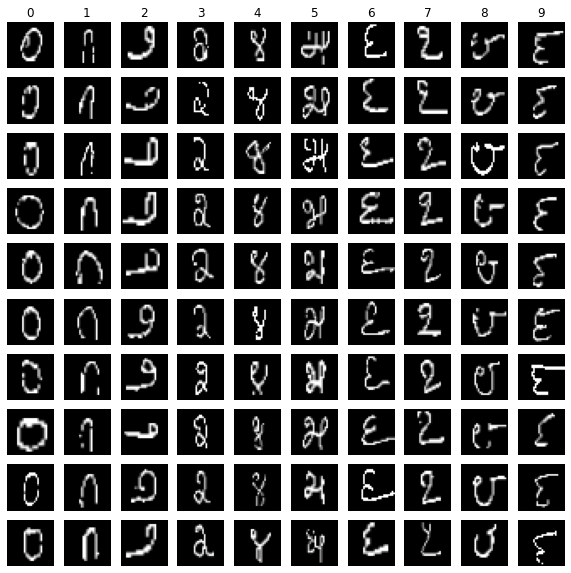

In [23]:
# Visualization Reference Kernel https://www.kaggle.com/josephvm/kannada-with-pytorch
# Some quick data visualization 
# First 10 images of each class in the training set

fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10,10))

# I know these for loops look weird, but this way num_i is only computed once for each class
for i in range(10): # Column by column
    num_i = X_train[y_train == i]
    ax[0][i].set_title(i)
    for j in range(10): # Row by row
        ax[j][i].axis('off')
        ax[j][i].imshow(num_i.iloc[j, :].to_numpy().astype(np.uint8).reshape(28, 28), cmap='gray')

<a id="7"></a> <br>
## 7- Machine Learning Algorithm


<a id="10"></a> <br>
## 7.1 Logistic Regression

Don’t get confused by its name! It is a classification not a regression algorithm. It is used to estimate discrete values ( Binary values like 0/1, yes/no, true/false ) based on given set of independent variable(s). In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function. Hence, it is also known as logit regression. Since, it predicts the probability, its output values lies between 0 and 1 (as expected).

In [24]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
ModelLR = LogisticRegression(C=5, solver='lbfgs', multi_class='multinomial')
ModelLR.fit(X_train, y_train)

y_predLR = ModelLR.predict(X_test)

# Accuracy score
print('accuracy is',accuracy_score(y_predLR,y_test))

score = accuracy_score(y_predLR,y_test)

accuracy is 0.9624166666666667


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
cm = confusion_matrix(y_test, y_predLR)
print(cm)

[[1199   26    2    4    1    1    3    2    3    0]
 [  18 1147    1    3    0    4    0    0    3    2]
 [   9    0 1200    4    0    2    1    0    0    0]
 [  13    0    0 1136    8    7    6   30    0    4]
 [   1    0    1    8 1195   14    0    0    1   10]
 [   0    3    5    6   15 1165    2    1    3    0]
 [   0    0    0    7    1    3 1135   60    0    7]
 [   1    2    0   28    2    2   43 1071    0    5]
 [   7    2    0    2    1    4    0    0 1149    5]
 [   3    0    0    1   14    0    9    9    6 1152]]


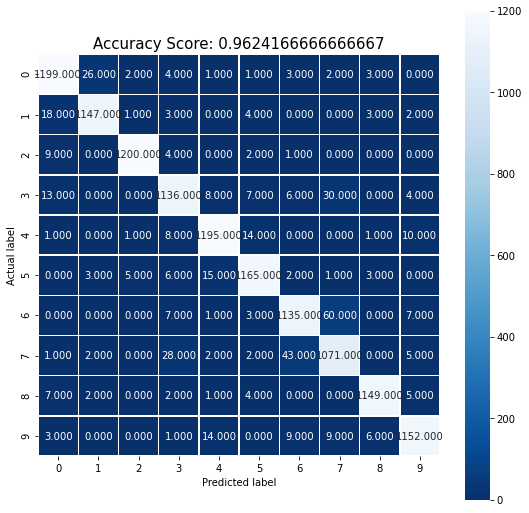

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

<a id="11"></a> <br>
## 7.2 Decision Tree 



In [27]:
# Seed for reproducability
seed = 1234
np.random.seed(seed)

In [28]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

DT = DecisionTreeClassifier(max_depth=10, random_state=seed)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=1234)

In [29]:
y_predDT = DT.predict(X_test)

# Accuracy score
print('accuracy DT',accuracy_score(y_predDT,y_test))

scoreDT= accuracy_score(y_predDT,y_test)

accuracy DT 0.8536666666666667


In [30]:
DTm =confusion_matrix(y_test, y_predDT)
print(DTm)

[[1136   35   16   11    3    4    1    3   25    7]
 [   9 1098    3    7    0    6    1    2   49    3]
 [  23    3 1073   43    1   37    6   11   17    2]
 [  24    3    4  973   16   46   25   56   57    0]
 [   3    1    5   49 1013   72    6   14   42   25]
 [   3    1    6   84   31  968    4   12   83    8]
 [  15    0    1   39    0   27  987   80   63    1]
 [  23    2    2   78   12   10   75  913   38    1]
 [  19    1    0    4    5   11    1    6 1112   11]
 [  15    2    6   63   38   20   12   12   55  971]]


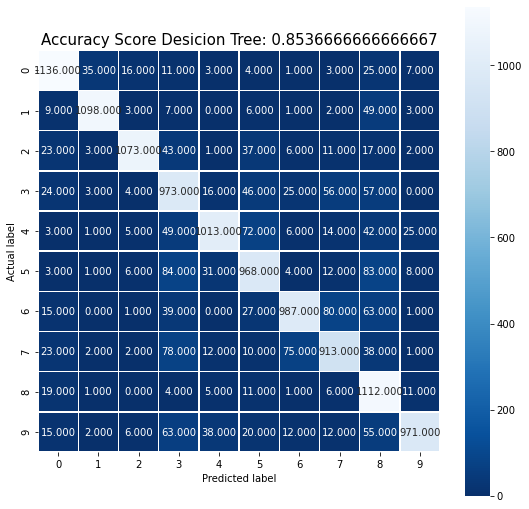

In [31]:
plt.figure(figsize=(9,9))
sns.heatmap(DTm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Desicion Tree: {0}'.format(scoreDT)
plt.title(all_sample_title, size = 15);

<a id="12"></a> <br>
## 7.3 PCA svm

In [32]:
from sklearn import svm
from sklearn.decomposition import PCA


In [33]:
pca = PCA(n_components=0.7,whiten=True)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)


In [34]:
sv = svm.SVC(kernel='rbf',C=9)
sv.fit(X_train_PCA , y_train)



SVC(C=9)

In [35]:
y_predsv = sv.predict(X_test_PCA)

In [36]:
print('accuracy is',accuracy_score(y_predsv,y_test))

scoreclf= accuracy_score(y_predsv,y_test)

accuracy is 0.9919166666666667


<a id="13"></a> <br>
## 7.4 XGBOOST

In [37]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
eval_set = [(X_test,y_test)]
model.fit(X_train, y_train, early_stopping_rounds= 5, eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

[0]	validation_0-merror:0.13033
Will train until validation_0-merror hasn't improved in 5 rounds.
[1]	validation_0-merror:0.08642
[2]	validation_0-merror:0.07058
[3]	validation_0-merror:0.06475
[4]	validation_0-merror:0.05825
[5]	validation_0-merror:0.05442
[6]	validation_0-merror:0.05100
[7]	validation_0-merror:0.04750
[8]	validation_0-merror:0.04450
[9]	validation_0-merror:0.04200
[10]	validation_0-merror:0.04008
[11]	validation_0-merror:0.03817
[12]	validation_0-merror:0.03583
[13]	validation_0-merror:0.03425
[14]	validation_0-merror:0.03342
[15]	validation_0-merror:0.03267
[16]	validation_0-merror:0.03092
[17]	validation_0-merror:0.02967
[18]	validation_0-merror:0.02908
[19]	validation_0-merror:0.02808
[20]	validation_0-merror:0.02725
[21]	validation_0-merror:0.02600
[22]	validation_0-merror:0.02592
[23]	validation_0-merror:0.02533
[24]	validation_0-merror:0.02500
[25]	validation_0-merror:0.02383
[26]	validation_0-merror:0.02400
[27]	validation_0-merror:0.02392
[28]	validation_0-me

In [38]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy XGBOOST: %.2f%%" % (accuracy * 100.0))

Accuracy XGBOOST: 98.52%


<a id="14"></a> <br>
## 7.5 AdaBoost

In [39]:
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train, y_train)
y_predAda=Model.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test,y_predAda))
print(confusion_matrix(y_pred,y_test))
#Accuracy Score
print('accuracy is ',accuracy_score(y_predAda,y_test))

AdaB = accuracy_score(y_predAda,y_test)

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1241
           1       0.83      0.65      0.73      1178
           2       0.58      0.92      0.71      1216
           3       0.71      0.72      0.71      1204
           4       0.76      0.77      0.77      1230
           5       0.74      0.64      0.69      1200
           6       0.64      0.87      0.73      1213
           7       0.62      0.32      0.42      1154
           8       0.77      0.83      0.80      1170
           9       0.80      0.66      0.72      1194

    accuracy                           0.72     12000
   macro avg       0.73      0.72      0.71     12000
weighted avg       0.73      0.72      0.72     12000

[[1213    8    7    6    1    0    1    1    1    2]
 [  23 1167    0    0    0    0    0    1    0    0]
 [   0    0 1205    0    0    1    0    0    0    0]
 [   1    1    3 1183    0    2    0    7    0    0]
 [   0    0    0    1 1223   

## SCORES 

In [40]:
models = pd.DataFrame({
    'Model': ['LogisticRegression','Decision Tree', 'PCA', 'XGBOOST', "AdaBoost classifier"
              ],
    'Score': [score,scoreDT,scoreclf,accuracy,AdaB]})
models.sort_values(by='Score', ascending=False)

Model     Score
2                  PCA  0.991917
3              XGBOOST  0.985167
0   LogisticRegression  0.962417
1        Decision Tree  0.853667
4  AdaBoost classifier  0.723083

Text(0, 0.5, 'Algorithm')

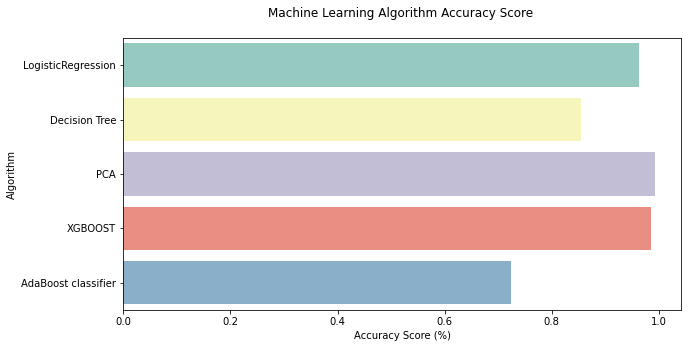

In [41]:
plt.subplots(figsize =(10, 5))

sns.barplot(x='Score', y = 'Model', data = models, palette="Set3")

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

<a id="15"></a> <br>
## 15- Submit Prediction

In [42]:
test_x = test.values[:,1:]
test_x = pca.transform(test_x)

In [43]:
preds = sv.predict(test_x)


In [44]:
submission['label'] = preds
submission.to_csv('submission.csv', index=False)

In [45]:
submission.head()

id  label
0   0      3
1   1      0
2   2      2
3   3      6
4   4      7

[Go to top](#top)


 **I hope this kernel helpful and some <font color="red"><b>UPVOTES</b></font> would be very much appreciated**
 